Im ersten Notebook wurde die Daten/Struktur angeschaut, nun sollen die Daten zusammengeführt werden für ein ganzes Jahr.
Schritte: pro Monat die Datentabellen zusammenführen, dann alle Monate.
Für die pro Jahr Analyse auch Monatsintervalle beachten.


In [1]:
# imports für das notebook
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import datetime as dt
# importing re for regular expressions
import re
import os

C:\Users\tzach\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## citibikenyc per year

### monthly intervalls


In [2]:
# analysis per month steps

def analysis_per_month(df_month):
    # get number of bike trips
    n_bike_trips = len(df_month.index)
    
    # other stuff
    # get number of stations used
    # get median bike trip duration
    
    
    return n_bike_trips

In [3]:
# summarize number for whole year

def analysis_summary_year(results_map):
    # sum up all bike trips to get total number:
    sum = 0
    for key in results_map:
        sum = sum + results_map[key]
        
    return sum

In [4]:
# specify year for analysis
year = 2023

month_list = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
#month_list = ["01", "06"]
base_folder_name = str(year)+"-citibike-tripdata"

#results
result_map = {}

# read in successively all data for month, then for all months
for month in month_list:
    print(month)
    #collect all files for the month
    month_folder_name = str(year) + month + "-citibike-tripdata"
    #dataframe for month
    df_list = []
    full_path = "Data/" + base_folder_name + "/" + month_folder_name + "/"
    for filename in os.listdir(full_path):
        if filename.endswith(".csv") and month_folder_name in filename:
            print(filename)
            df_month_partial = pd.read_csv(full_path + filename)
            df_list.append(df_month_partial)

    df_month = pd.concat(df_list, axis=0, ignore_index=True)
    
    # perform monthly analysis
    result = analysis_per_month(df_month)
    result_map[month] = result
    
    print("month: " + month)
    print(result)
    
print(result_map)

01
202301-citibike-tripdata_1.csv


C:\Users\tzach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


202301-citibike-tripdata_2.csv
month: 01
1795412
02
202302-citibike-tripdata_1.csv
202302-citibike-tripdata_2.csv
month: 02
1696171
03
202303-citibike-tripdata_1.csv


C:\Users\tzach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


202303-citibike-tripdata_2.csv
202303-citibike-tripdata_3.csv
month: 03
2118932
04
202304-citibike-tripdata_1.csv
202304-citibike-tripdata_2.csv
202304-citibike-tripdata_3.csv
month: 04
2749716
05
202305-citibike-tripdata_1.csv
202305-citibike-tripdata_2.csv
202305-citibike-tripdata_3.csv
202305-citibike-tripdata_4.csv
month: 05
3453152
06
202306-citibike-tripdata_1.csv
202306-citibike-tripdata_2.csv
202306-citibike-tripdata_3.csv
202306-citibike-tripdata_4.csv
month: 06
3451549
07
202307-citibike-tripdata_1.csv
202307-citibike-tripdata_2.csv
202307-citibike-tripdata_3.csv
202307-citibike-tripdata_4.csv
month: 07
3659581
08
202308-citibike-tripdata_1.csv
202308-citibike-tripdata_2.csv
202308-citibike-tripdata_3.csv
202308-citibike-tripdata_4.csv
month: 08
3964180
09
202309-citibike-tripdata_1.csv
202309-citibike-tripdata_2.csv
202309-citibike-tripdata_3.csv
202309-citibike-tripdata_4.csv


C:\Users\tzach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


month: 09
3471150
10
202310-citibike-tripdata_1.csv
202310-citibike-tripdata_2.csv
202310-citibike-tripdata_3.csv
202310-citibike-tripdata_4.csv
month: 10
3725336
11
202311-citibike-tripdata_1.csv
202311-citibike-tripdata_2.csv
202311-citibike-tripdata_3.csv
month: 11
2816977
12
202312-citibike-tripdata_1.csv
202312-citibike-tripdata_2.csv
202312-citibike-tripdata_3.csv
month: 12
2204874
{'01': 1795412, '02': 1696171, '03': 2118932, '04': 2749716, '05': 3453152, '06': 3451549, '07': 3659581, '08': 3964180, '09': 3471150, '10': 3725336, '11': 2816977, '12': 2204874}


Text(0.5, 1.0, 'citibikenyc: number of trips per month in 2023')

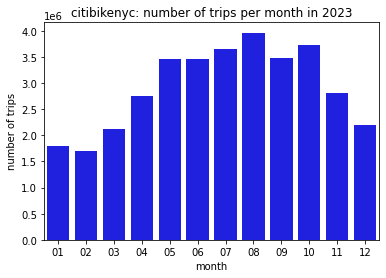

In [5]:
# plot
result_map_extended = {}
result_map_extended[2023] = result_map
df_bike_trips_year = pd.DataFrame.from_dict(result_map_extended)
df_bike_trips_year["month"] = df_bike_trips_year.index
df_bike_trips_year = df_bike_trips_year.rename(columns={2023: 'number of trips'})

sns.barplot(data = df_bike_trips_year, x = 'month', y = 'number of trips', color='b').set_title('citibikenyc: number of trips per month in 2023')

### all year stats

In [6]:
# year summary
analysis_summary_year(result_map)

35107030

## NYC accidents per year

### monthly intervalls

In [7]:
#Einlesen der Unfall Daten von NYC
table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")

table_accidents

C:\Users\tzach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162654,03/15/2025,0:00,MANHATTAN,10011.0,40.737858,-73.996704,"(40.737858, -73.996704)",NaN,NaN,541 AVENUE OF THE AMERICAS,...,Unspecified,NaN,NaN,NaN,4799150,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2162655,03/15/2025,14:08,NaN,NaN,40.623123,-74.167595,"(40.623123, -74.167595)",LISK AVE,SOUTH AVE,NaN,...,Unspecified,NaN,NaN,NaN,4799203,Taxi,Pick-up Truck,NaN,NaN,NaN
2162656,03/15/2025,10:09,NaN,NaN,40.787760,-73.791370,"(40.78776, -73.79137)",CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4798984,Sedan,NaN,NaN,NaN,NaN
2162657,03/15/2025,17:30,QUEENS,11373.0,40.746740,-73.883640,"(40.74674, -73.88364)",NaN,NaN,40-31 82 ST,...,Unspecified,NaN,NaN,NaN,4799434,Sedan,Sedan,NaN,NaN,NaN


In [8]:
# restrict to year of interest
table_accidents["CRASH DATE"]= pd.to_datetime(table_accidents["CRASH DATE"])

table_accidents_year = table_accidents[table_accidents["CRASH DATE"].dt.year == year]
table_accidents_year

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2,2023-11-01,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
5,2023-04-26,13:30,NaN,NaN,NaN,NaN,NaN,WEST 54 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4623759,Sedan,Box Truck,NaN,NaN,NaN
6,2023-11-01,7:12,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4675709,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,2023-11-01,8:01,NaN,NaN,NaN,NaN,NaN,WEST 35 STREET,HENRY HUDSON RIVER,NaN,...,NaN,NaN,NaN,NaN,4675769,Sedan,NaN,NaN,NaN,NaN
8,2023-04-26,22:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 Ed Koch queensborough bridge,...,NaN,NaN,NaN,NaN,4623865,Sedan,Pick-up Truck,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151983,2023-06-04,19:28,MANHATTAN,10010.0,40.737545,-73.984090,"(40.737545, -73.98409)",3 AVENUE,EAST 21 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,4634861,Sedan,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN
2151984,2023-09-13,3:05,QUEENS,11372.0,40.747856,-73.881905,"(40.747856, -73.881905)",NaN,NaN,84-07 ROOSEVELT AVENUE,...,Unspecified,NaN,NaN,NaN,4661989,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
2151985,2023-11-27,23:53,QUEENS,11101.0,40.750430,-73.935330,"(40.75043, -73.93533)",NaN,NaN,29-76 NORTHERN BOULEVARD,...,Unspecified,NaN,NaN,NaN,4682752,Motorscooter,Taxi,NaN,NaN,NaN
2153888,2023-08-31,18:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utica Avenue,...,Unspecified,NaN,NaN,NaN,4658657,Motorcycle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [9]:
sum = 0
results_accidents = {}
for month in range(1,13):
    print("month: "+ str(month))
    table_accidents_month = table_accidents_year[table_accidents_year["CRASH DATE"].dt.month == month]
    sum = sum + len(table_accidents_month)
    print("number of accidents: " + str(len(table_accidents_month)))
    
    if len(results_accidents.keys()) == 0:
        results_accidents["NUMBER OF PERSONS INJURED"] = {}
        results_accidents["NUMBER OF PERSONS KILLED"] = {}
        results_accidents["NUMBER OF PEDESTRIANS INJURED"] = {}
        results_accidents["NUMBER OF PEDESTRIANS KILLED"] = {}
        results_accidents["NUMBER OF CYCLIST INJURED"] = {}
        results_accidents["NUMBER OF CYCLIST KILLED"] = {}
        results_accidents["NUMBER OF MOTORIST INJURED"] = {}
        results_accidents["NUMBER OF MOTORIST KILLED"] = {}
    
    results_accidents["NUMBER OF PERSONS INJURED"][month] = table_accidents_month["NUMBER OF PERSONS INJURED"].sum(skipna = True)
    results_accidents["NUMBER OF PERSONS KILLED"][month] = table_accidents_month["NUMBER OF PERSONS KILLED"].sum(skipna = True)
    results_accidents["NUMBER OF PEDESTRIANS INJURED"][month] = table_accidents_month["NUMBER OF PEDESTRIANS INJURED"].sum(skipna = True)
    results_accidents["NUMBER OF PEDESTRIANS KILLED"][month] = table_accidents_month["NUMBER OF PEDESTRIANS KILLED"].sum(skipna = True)
    results_accidents["NUMBER OF CYCLIST INJURED"][month] = table_accidents_month["NUMBER OF CYCLIST INJURED"].sum(skipna = True)
    results_accidents["NUMBER OF CYCLIST KILLED"][month] = table_accidents_month["NUMBER OF CYCLIST KILLED"].sum(skipna = True)
    results_accidents["NUMBER OF MOTORIST INJURED"][month] = table_accidents_month["NUMBER OF MOTORIST INJURED"].sum(skipna = True)
    results_accidents["NUMBER OF MOTORIST KILLED"][month] = table_accidents_month["NUMBER OF MOTORIST KILLED"].sum(skipna = True)
    
print(sum)
print(results_accidents)

month: 1
number of accidents: 7466
month: 2
number of accidents: 6884
month: 3
number of accidents: 8179
month: 4
number of accidents: 7772
month: 5
number of accidents: 8994
month: 6
number of accidents: 8191
month: 7
number of accidents: 8243
month: 8
number of accidents: 8014
month: 9
number of accidents: 8293
month: 10
number of accidents: 8716
month: 11
number of accidents: 7859
month: 12
number of accidents: 7994
96605
{'NUMBER OF PERSONS INJURED': {1: 3727.0, 2: 3537.0, 3: 4305.0, 4: 4311.0, 5: 5004.0, 6: 4599.0, 7: 5139.0, 8: 4800.0, 9: 4770.0, 10: 5071.0, 11: 4480.0, 12: 4507.0}, 'NUMBER OF PERSONS KILLED': {1: 20.0, 2: 14.0, 3: 21.0, 4: 21.0, 5: 25.0, 6: 22.0, 7: 20.0, 8: 31.0, 9: 22.0, 10: 30.0, 11: 31.0, 12: 23.0}, 'NUMBER OF PEDESTRIANS INJURED': {1: 865, 2: 631, 3: 782, 4: 620, 5: 793, 6: 653, 7: 665, 8: 621, 9: 768, 10: 914, 11: 875, 12: 889}, 'NUMBER OF PEDESTRIANS KILLED': {1: 7, 2: 7, 3: 11, 4: 12, 5: 5, 6: 7, 7: 7, 8: 6, 9: 8, 10: 13, 11: 15, 12: 9}, 'NUMBER OF CYCLI

In [14]:
df_accidents_year = pd.DataFrame.from_dict(results_accidents)
df_accidents_year["CHECK"] = df_accidents_year["NUMBER OF PEDESTRIANS INJURED"] + df_accidents_year["NUMBER OF CYCLIST INJURED"] + df_accidents_year["NUMBER OF MOTORIST INJURED"]
df_accidents_year["month"] = df_bike_trips_year.index
df_accidents_year_long = pd.melt(df_accidents_year, id_vars=['month'], value_vars=['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', \
                                                      'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', \
                                                      'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', \
                                                      'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'], ignore_index=False).reset_index(drop=True)

df_accidents_year_long['value'] = df_accidents_year_long['value'].astype(int)
df_accidents_year_long = df_accidents_year_long.sort_values(by=['month', 'variable'])
df_accidents_year_long

,month,variable,value
48,01,NUMBER OF CYCLIST INJURED,243
60,01,NUMBER OF CYCLIST KILLED,3
72,01,NUMBER OF MOTORIST INJURED,2468
84,01,NUMBER OF MOTORIST KILLED,8
24,01,NUMBER OF PEDESTRIANS INJURED,865
...,...,...,...
95,12,NUMBER OF MOTORIST KILLED,10
35,12,NUMBER OF PEDESTRIANS INJURED,889
47,12,NUMBER OF PEDESTRIANS KILLED,9
11,12,NUMBER OF PERSONS INJURED,4507


In [15]:
rcParams['figure.figsize'] = 15,10

Text(0.5, 1.0, 'NYC accident injuries per month in 2023')

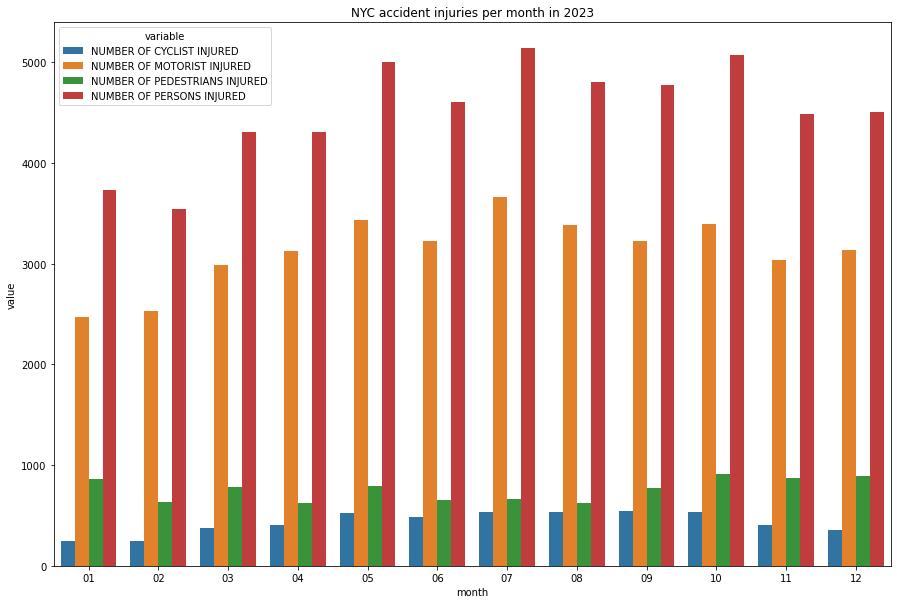

In [16]:
# injured plot
df_accidents_year_long_injured = df_accidents_year_long[df_accidents_year_long["variable"].str.contains("INJURED")]
df_accidents_year_long_injured

sns.barplot(data = df_accidents_year_long_injured, x = 'month', y='value', hue='variable').set_title('NYC accident injuries per month in 2023')


Text(0.5, 1.0, 'NYC accident deaths per month in 2023')

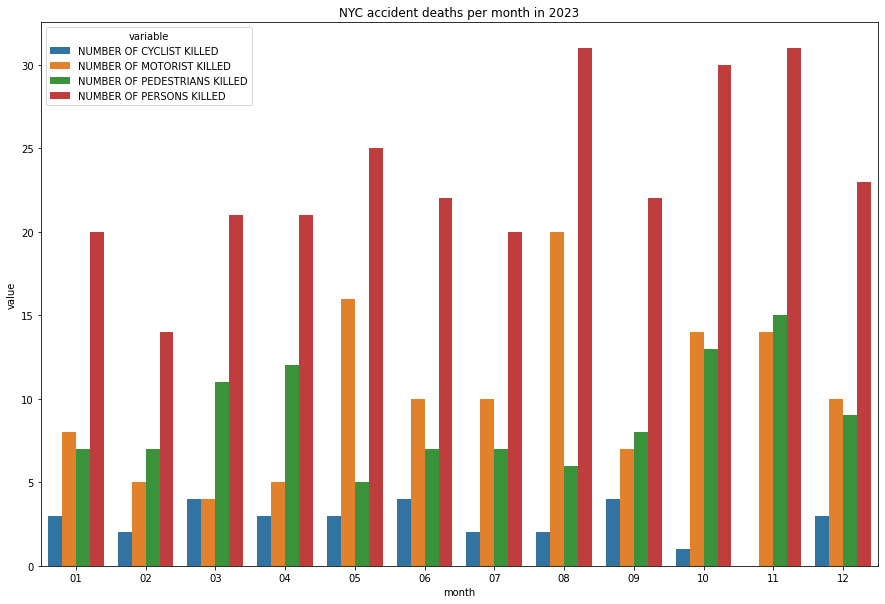

In [17]:
# killed plot
df_accidents_year_long_killed = df_accidents_year_long[df_accidents_year_long["variable"].str.contains("KILLED")]
df_accidents_year_long_killed

sns.barplot(data = df_accidents_year_long_killed, x = 'month', y='value', hue='variable').set_title('NYC accident deaths per month in 2023')
